In [67]:
%reload_ext autoreload
%autoreload 2
from alpharaw.ms_data_base import ms_reader_provider
from alpharaw import register_all_readers
from dia_aspire_rescore.io import read_diann2
import pandas as pd
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
from dia_aspire_rescore.psm.matcher import DIAPeptideSpectrumMatcher
from alphabase.peptide.fragment import flatten_fragments
# import logging

# logging.basicConfig(
#     level=logging.WARNING,  # Root logger at WARNING level
#     format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
# )

# logging.getLogger('dia_aspire_rescore').setLevel(logging.DEBUG)
# logging.getLogger('numba').setLevel(logging.WARNING)

register_all_readers()

In [68]:
psm_df_original = read_diann2("../../data/raw/SYS026_RA957/DDA_SYSMHC_bynam/lib-base-result-first-pass.parquet")
# decreasing rt order
psm_df_sorted = psm_df_original.sort_values(by="nAA", ascending=True)
psm_df_sorted = psm_df_sorted[psm_df_sorted['fdr1_search1'] < 0.01].reset_index(drop=True)

spec_dict = {}
peak_dict = {}

for run in psm_df_original['raw_name'].unique():
    hdf_reader = ms_reader_provider.get_reader("hdf5")
    hdf_reader.load_raw(f"../output/{run}.mzML.hdf5")
    spec_dict[run] = hdf_reader.spectrum_df
    peak_dict[run] = hdf_reader.peak_df


/Users/zshang/Projects/DIA-Aspire-rescore/.venv/lib/python3.11/site-packages/alphabase/psm_reader/psm_reader.py:342: UserWarning: Unknown modifications: {'Q(UniMod:1)'}. Precursors with unknown modifications will be removed.
  warnings.warn(


In [69]:
matcher = DIAPeptideSpectrumMatcher(n_neighbors=0)
psm_df_sorted_in = psm_df_sorted[0:1000].copy()
psm_df, fragment_mz_df, matched_intensity_df, matched_mz_err_df = matcher.match_ms2_multi_raw(
    psm_df_sorted_in,
    {'20200317_QE_HFX2_LC3_DIA_RA957_R01': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R01.mzML.hdf5',
     '20200317_QE_HFX2_LC3_DIA_RA957_R02': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R02.mzML.hdf5'},
    'hdf5',
)

100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


In [70]:
psm_df

,raw_name,sequence,charge,rt,rt_start,rt_stop,mobility,proteins,uniprot_ids,genes,...,fdr2_search2,mods,mod_sites,nAA,rt_norm,precursor_mz,ccs,frag_start_idx,frag_stop_idx,spec_idx
0,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPGASL,1,73.935051,73.812119,74.120216,0.0,1/sp|Q9Y6J0|CABIN_HUMAN,1/sp|Q9Y6J0|CABIN_HUMAN,,...,0.0,,,8,0.617759,711.403566,0.0,0,7,54755
1,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPAESL,1,75.566612,75.290459,75.842407,0.0,1/sp|Q86WR7|PRSR2_HUMAN,1/sp|Q86WR7|PRSR2_HUMAN,,...,0.0,,,8,0.631391,783.424696,0.0,7,14,55953
2,20200317_QE_HFX2_LC3_DIA_RA957_R01,FADAVQEL,1,82.514763,82.237434,82.637947,0.0,1/uc003usw.1,1/uc003usw.1,,...,0.0,,,8,0.689446,892.441074,0.0,28,35,61154
3,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPSDLL,1,102.817657,102.632812,103.032539,0.0,1/sp|Q96N21|AP4AT_HUMAN,1/sp|Q96N21|AP4AT_HUMAN,,...,0.0,,,8,0.859085,811.455996,0.0,35,42,76309
4,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPNPIL,1,97.764778,97.581024,97.948593,0.0,1/sp|Q9Y3I1|FBX7_HUMAN,1/sp|Q9Y3I1|FBX7_HUMAN,,...,0.0,,,8,0.816866,820.492716,0.0,49,56,72560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20200317_QE_HFX2_LC3_DIA_RA957_R02,TRTFGLEL,2,88.424637,88.301315,88.579025,0.0,1/sp|Q7Z3U7|MON2_HUMAN,1/sp|Q7Z3U7|MON2_HUMAN,,...,0.0,,,8,0.739380,468.761092,0.0,6944,6951,65463
996,20200317_QE_HFX2_LC3_DIA_RA957_R02,LHIQGNRL,2,43.462410,43.306034,43.587643,0.0,1/sp|Q15404|RSU1_HUMAN,1/sp|Q15404|RSU1_HUMAN,,...,0.0,,,8,0.363419,475.780151,0.0,6951,6958,31952
997,20200317_QE_HFX2_LC3_DIA_RA957_R02,LHQEGHSM,2,15.094681,14.969333,15.220013,0.0,1/sp|O43172|PRP4_HUMAN,1/sp|O43172|PRP4_HUMAN,,...,0.0,,,8,0.126217,469.711077,0.0,6965,6972,11068
998,20200317_QE_HFX2_LC3_DIA_RA957_R02,LHQEGAKM,2,18.036077,17.942076,18.161428,0.0,1/sp|P35222|CTNB1_HUMAN,1/sp|P35222|CTNB1_HUMAN,,...,0.0,,,8,0.150812,457.231645,0.0,6979,6986,13229


In [71]:
psm_df, flat_frag_df = flatten_fragments(
    precursor_df=psm_df,
    fragment_mz_df=fragment_mz_df,
    fragment_intensity_df=matched_intensity_df
)

psm_df.head()

,raw_name,sequence,charge,rt,rt_start,rt_stop,mobility,proteins,uniprot_ids,genes,...,mod_sites,nAA,rt_norm,precursor_mz,ccs,frag_start_idx,frag_stop_idx,spec_idx,flat_frag_start_idx,flat_frag_stop_idx
0,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPGASL,1,73.935051,73.812119,74.120216,0.0,1/sp|Q9Y6J0|CABIN_HUMAN,1/sp|Q9Y6J0|CABIN_HUMAN,,...,,8,0.617759,711.403566,0.0,0,7,54755,0,14
1,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPAESL,1,75.566612,75.290459,75.842407,0.0,1/sp|Q86WR7|PRSR2_HUMAN,1/sp|Q86WR7|PRSR2_HUMAN,,...,,8,0.631391,783.424696,0.0,7,14,55953,14,28
2,20200317_QE_HFX2_LC3_DIA_RA957_R01,FADAVQEL,1,82.514763,82.237434,82.637947,0.0,1/uc003usw.1,1/uc003usw.1,,...,,8,0.689446,892.441074,0.0,28,35,61154,56,70
3,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPSDLL,1,102.817657,102.632812,103.032539,0.0,1/sp|Q96N21|AP4AT_HUMAN,1/sp|Q96N21|AP4AT_HUMAN,,...,,8,0.859085,811.455996,0.0,35,42,76309,70,84
4,20200317_QE_HFX2_LC3_DIA_RA957_R01,LPGPNPIL,1,97.764778,97.581024,97.948593,0.0,1/sp|Q9Y3I1|FBX7_HUMAN,1/sp|Q9Y3I1|FBX7_HUMAN,,...,,8,0.816866,820.492716,0.0,49,56,72560,98,112


In [72]:
def plot_spectrum(spec_dict, peak_dict, psm_df, psm_idx, flat_frag_df, ):
    id = psm_df.iloc[psm_idx]['raw_name'] + '_' + str(psm_df.iloc[psm_idx]['spec_idx'])
    spec_id = psm_df.iloc[psm_idx]['spec_idx']
    print(f'raw_name: {psm_df.iloc[psm_idx]["raw_name"]}')
    print(f'seq: {psm_df.iloc[psm_idx]["sequence"]}')
    print(f'mods: {psm_df.iloc[psm_idx]["mods"]}')
    print(f'mod_sites: {psm_df.iloc[psm_idx]["mod_sites"]}')
    print(f'spec_idx: {psm_df.iloc[psm_idx]["spec_idx"]}')
    print(f'precursor_mz: {psm_df.iloc[psm_idx]["precursor_mz"]}')
    print(f'charge: {psm_df.iloc[psm_idx]["charge"]}')
    print(f'sequence: {psm_df.iloc[psm_idx]["sequence"]}')
    print(f'rt: {psm_df.iloc[psm_idx]["rt"]}')
    print(f'rt_start: {psm_df.iloc[psm_idx]["rt_start"]}')
    print(f'rt_stop: {psm_df.iloc[psm_idx]["rt_stop"]}')
    print(f'frag_start_idx: {psm_df.iloc[psm_idx]["frag_start_idx"]}')
    print(f'frag_stop_idx: {psm_df.iloc[psm_idx]["frag_stop_idx"]}')
    peak_df = peak_dict[psm_df.iloc[psm_idx]['raw_name']]
    spec_df = spec_dict[psm_df.iloc[psm_idx]['raw_name']]
    peak_start = spec_df.loc[spec_id, 'peak_start_idx']
    peak_stop = spec_df.loc[spec_id, 'peak_stop_idx']
    print(f'peak_start: {peak_start}')
    print(f'peak_stop: {peak_stop}')
    flat_frag_start_idx = psm_df.iloc[psm_idx]['flat_frag_start_idx']
    flat_frag_stop_idx = psm_df.iloc[psm_idx]['flat_frag_stop_idx']
    flat_frags = flat_frag_df.iloc[flat_frag_start_idx:flat_frag_stop_idx]
    #frag_mz_df = 
    
    peak_mz = peak_df['mz'][peak_start:peak_stop]
    peak_intensity = peak_df['intensity'][peak_start:peak_stop]
    spectrum = sus.MsmsSpectrum(
        identifier=id,
        precursor_mz=psm_df.iloc[psm_idx]['precursor_mz'],  
        precursor_charge=psm_df.iloc[psm_idx]['charge'],
        mz=peak_mz,
        intensity=peak_intensity,
    )
    spectrum.annotate_proforma(
        psm_df.iloc[psm_idx]['sequence'], # TODO: peptidoform
        fragment_tol_mass=20,
        fragment_tol_mode='ppm',
        ion_types="by",
        max_ion_charge=2,
    )
    fig, ax = plt.subplots(figsize=(12, 6))
    sup.spectrum(spectrum, grid=False, ax=ax)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.show()
    
    return flat_frags
    

raw_name: 20200317_QE_HFX2_LC3_DIA_RA957_R01
seq: ERLQGLVL
mods: 
mod_sites: 
spec_idx: 62128
precursor_mz: 464.28473440351
charge: 2
sequence: ERLQGLVL
rt: 83.79027557373047
rt_start: 83.63640594482422
rt_stop: 83.91336059570312
frag_start_idx: 1372
frag_stop_idx: 1379
peak_start: 90651223
peak_stop: 90652364


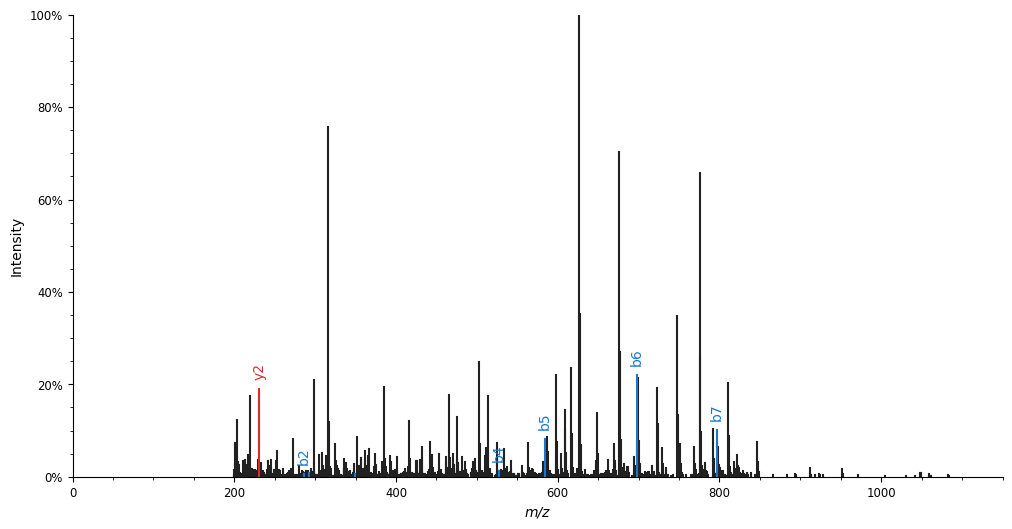

In [73]:
frags = plot_spectrum(spec_dict, peak_dict, psm_df, 100,flat_frag_df)

In [74]:
frags

,mz,intensity,type,loss_type,charge,number,position
4718,130.049866,0.000000e+00,98,0,1,1,0
4719,65.528572,0.000000e+00,98,0,2,1,0
4720,798.519592,0.000000e+00,121,0,1,7,0
4721,399.763428,0.000000e+00,121,0,2,7,0
4722,286.150970,1.066227e+05,98,0,1,2,1
4723,143.579132,0.000000e+00,98,0,2,2,1
4724,642.418518,0.000000e+00,121,0,1,6,1
4725,321.712891,0.000000e+00,121,0,2,6,1
4726,399.235046,0.000000e+00,98,0,1,3,2
4727,200.121155,0.000000e+00,98,0,2,3,2


---

In [75]:
psm_df_original = read_diann2("../../data/raw/SYS026_RA957/DDA_SYSMHC_bynam/lib-base-result-first-pass.parquet")
# decreasing rt order
psm_df_sorted = psm_df_original.sort_values(by="nAA", ascending=True)
psm_df_sorted = psm_df_sorted[psm_df_sorted['fdr1_search1'] < 0.01].reset_index(drop=True)

matcher = DIAPeptideSpectrumMatcher(n_neighbors=0)
psm_df_sorted_in = psm_df_sorted[0:2].copy()
psm_df, fragment_mz_df, matched_intensity_df, matched_mz_err_df = matcher.match_ms2_multi_raw(
    psm_df_sorted_in,
    {'20200317_QE_HFX2_LC3_DIA_RA957_R01': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R01.mzML.hdf5',
     '20200317_QE_HFX2_LC3_DIA_RA957_R02': '../output/20200317_QE_HFX2_LC3_DIA_RA957_R02.mzML.hdf5'},
    'hdf5',
)

/Users/zshang/Projects/DIA-Aspire-rescore/.venv/lib/python3.11/site-packages/alphabase/psm_reader/psm_reader.py:342: UserWarning: Unknown modifications: {'Q(UniMod:1)'}. Precursors with unknown modifications will be removed.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


In [76]:
psm_df, flat_frag_df = flatten_fragments(
    precursor_df=psm_df,
    fragment_mz_df=fragment_mz_df,
    fragment_intensity_df=matched_intensity_df
)

raw_name: 20200317_QE_HFX2_LC3_DIA_RA957_R01
seq: LPGPGASL
mods: 
mod_sites: 
spec_idx: 54755
precursor_mz: 711.4035664385599
charge: 1
sequence: LPGPGASL
rt: 73.93505096435547
rt_start: 73.81211853027344
rt_stop: 74.1202163696289
frag_start_idx: 0
frag_stop_idx: 7
peak_start: 77533536
peak_stop: 77535847


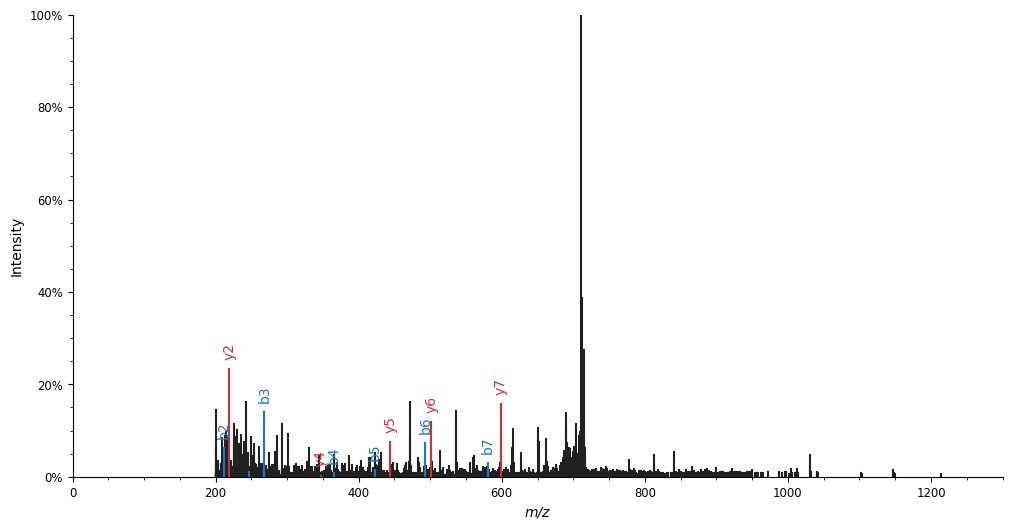

In [77]:
frags = plot_spectrum(spec_dict, peak_dict, psm_df, 0, flat_frag_df)

In [78]:
frags

,mz,intensity,type,loss_type,charge,number,position
0,114.091339,0.000000,98,0,1,1,0
1,598.319519,494901.531250,121,0,1,7,0
2,211.144104,194970.406250,98,0,1,2,1
3,501.266724,374790.312500,121,0,1,6,1
4,268.165558,440298.562500,98,0,1,3,2
5,444.245270,236016.218750,121,0,1,5,2
6,365.218323,22997.832031,98,0,1,4,3
7,347.192505,5882.197266,121,0,1,4,3
8,422.239807,42980.621094,98,0,1,5,4
9,290.171051,0.000000,121,0,1,3,4
